In [0]:
import pandas as pd
import numpy as np
import json
import requests
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pyspark.sql.types import StructType,StructField, StringType, IntegerType 
from pyspark.sql.types import ArrayType, DoubleType, BooleanType

In [0]:
import pyspark.pandas as ps

In [0]:
data_path = '/FileStore/tables/loans.csv'

df = ps.read_csv(data_path, header=None, names=['loan_amount', 'address', 'created_at', 'funded_at'],
                      infer_datetime_format=True, parse_dates=['created_at', 'funded_at'])


--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-3274947637925294> in <module> 
 1 data_path = '/FileStore/tables/loans.csv' 
 2 
 ----> 3 df = ps.read_csv(data_path, header=None, names=['loan_amount', 'address', 'created_at', 'funded_at'],
 4 infer_datetime_format=True, parse_dates=['created_at', 'funded_at'])

 /databricks/spark/python/pyspark/pandas/usage_logging/__init__.py in wrapper (*args, **kwargs) 
 192 start = time . perf_counter ( ) 
 193 try : 
 --> 194 res = func ( * args , ** kwargs ) 
 195 logger.log_success(
 196 class_name , function_name , time . perf_counter ( ) - start , signature

 /databricks/spark/python/pyspark/pandas/namespace.py in read_csv (path, sep, header, names, index_col, usecols, squeeze, mangle_dupe_cols, dtype, nrows, parse_dates, quotechar, escapechar, comment, **options) 
 296 raise ValueError ( "mangle_dupe_cols can only be `True`: %s" % mangle_dupe_cols ) 
 297 if parse_dates is not False : 
 --> 298 raise ValueError ( "parse_dates can only be `False`: %s" % parse_dates ) 
 299 
 300 if usecols is not None and not callable ( usecols ) : 

 ValueError : parse_dates can only be `False`: ['created_at', 'funded_at']

In [0]:
df = ps.read_csv(data_path, header=None, names=['loan_amount', 'address', 'created_at', 'funded_at'],
                      infer_datetime_format=True, parse_dates=False)

In [0]:
df.dtypes

Out[7]: loan_amount float64
address object
created_at datetime64[ns]
funded_at datetime64[ns]
dtype: object

In [0]:
display(data)

_c0,_c1,_c2,_c3
568705.0,"22226 Brookpine, Mission Viejo CA 92692",2016-12-20T07:16:04.778800+00:00,null
413165.0,"124 Vignolia Court, Roseville CA 95747",2016-10-11T20:35:19.951835+00:00,2016-11-07T00:00:00+00:00
584083.0,"13909 Via Del Jamul Dr, Jamul CA 91935",2017-08-08T03:23:04.349419+00:00,null
258680.0,"13209 N Mayfair Ln, Spokane WA 99208",2017-05-25T19:06:01.525985+00:00,null
170180.0,"205 Cottontail Ln, Elkin NC 28621",2017-03-02T19:40:13.319275+00:00,null
262453.0,"6320-6330 Meadow Glen Pl, Rancho Cucamonga CA 91737",2016-12-04T21:22:00.129733+00:00,null
504193.0,"10190 Brixton Pl, Suwanee GA 30024",2017-08-18T02:10:04.921255+00:00,2017-09-18T00:00:00+00:00
196334.0,"2805 Crested Butte Trail, Plainfield IL 60586",2017-04-09T23:39:04.896337+00:00,null
275236.0,"1952 S St SE, Washington DC 20020",2017-09-23T23:30:28.455400+00:00,2017-11-15T00:00:00+00:00
895659.0,"7310 Emlen St, Philadelphia PA 19119",2017-08-13T03:43:39.946567+00:00,null


In [0]:
df.head()

Out[6]:

,_c0,_c1,_c2,_c3
0,568705.0,"22226 Brookpine, Mission Viejo CA 92692",2016-12-20T07:16:04.778800+00:00,None
1,413165.0,"124 Vignolia Court, Roseville CA 95747",2016-10-11T20:35:19.951835+00:00,2016-11-07T00:00:00+00:00
2,584083.0,"13909 Via Del Jamul Dr, Jamul CA 91935",2017-08-08T03:23:04.349419+00:00,None
3,258680.0,"13209 N Mayfair Ln, Spokane WA 99208",2017-05-25T19:06:01.525985+00:00,None
4,170180.0,"205 Cottontail Ln, Elkin NC 28621",2017-03-02T19:40:13.319275+00:00,None


In [0]:
df.columns = ['loan_amount', 'address', 'created_at', 'funded_at']

In [0]:
df.head()

Out[8]:

,loan_amount,address,created_at,funded_at
0,568705.0,"22226 Brookpine, Mission Viejo CA 92692",2016-12-20T07:16:04.778800+00:00,None
1,413165.0,"124 Vignolia Court, Roseville CA 95747",2016-10-11T20:35:19.951835+00:00,2016-11-07T00:00:00+00:00
2,584083.0,"13909 Via Del Jamul Dr, Jamul CA 91935",2017-08-08T03:23:04.349419+00:00,None
3,258680.0,"13209 N Mayfair Ln, Spokane WA 99208",2017-05-25T19:06:01.525985+00:00,None
4,170180.0,"205 Cottontail Ln, Elkin NC 28621",2017-03-02T19:40:13.319275+00:00,None


In [0]:
df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 5143 entries, 0 to 5142
Data columns (total 4 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 loan_amount 5143 non-null object
 1 address 5143 non-null object
 2 created_at 5143 non-null object
 3 funded_at 1055 non-null object
dtypes: object(4)

In [0]:
df.loan_amount.describe().apply(lambda x: format(x, 'f'))

Out[8]: count 5143.000000
mean 382389.442738
std 1271107.564632
min 9.000000
25% 216522.000000
50% 317911.000000
75% 421650.000000
max 57762492.000000
Name: loan_amount, dtype: object

In [0]:
df.loan_amount.describe().apply(lambda x: format(x, 'f'))

Out[9]: count 5143.000000
mean 382389.442738
std 1271107.564632
min 9.000000
25% 216522.000000
50% 317911.000000
75% 421650.000000
max 57762492.000000
Name: loan_amount, dtype: object

In [0]:
df.loan_amount.hist(bins=25)

Out[6]:

In [0]:
df.loan_amount.quantile(0.999)

Out[7]: 2150000.0

In [0]:
df.loan_amount.quantile(0.005)

Out[8]: 32960.0

In [0]:
q999 = df.loan_amount.quantile(0.999)
q005 = df.loan_amount.quantile(0.005)

In [0]:
df = df[df.loan_amount <= q999]
df.shape

Out[10]: (5137, 4)

In [0]:
df = df[df.loan_amount >= q005]
df.shape

Out[11]: (5113, 4)

In [0]:
df.loan_amount.hist(bins=50)

Out[12]:

In [0]:
df.describe()

Out[13]:

,loan_amount
count,5.113000e+03
mean,3.512678e+05
std,2.015650e+05
min,3.296000e+04
25%,2.184870e+05
50%,3.185000e+05
75%,4.216680e+05
max,2.150000e+06


In [0]:
df = df[df.created_at >= '2016-06-01']
df.shape

Out[16]: (5026, 4)

In [0]:
df['time_to_conversion'] = (df.funded_at - df.created_at).dt.days

/databricks/spark/python/pyspark/pandas/data_type_ops/datetime_ops.py:61: UserWarning:

Note that there is a behavior difference of timestamp subtraction. The timestamp subtraction returns an integer in seconds, whereas pandas returns 'timedelta64[ns]'.

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-2811957860834228> in <module> 
 ----> 1 df [ 'time_to_conversion' ] = ( df . funded_at - df . created_at ) . dt . days

 /databricks/python/lib/python3.8/site-packages/pandas/core/accessor.py in __get__ (self, obj, cls) 
 178 # we're accessing the attribute of the class, i.e., Dataset.geo 
 179 return self . _accessor
 --> 180 accessor_obj = self . _accessor ( obj ) 
 181 # Replace the property with the accessor object. Inspired by: 
 182 # https://www.pydanny.com/cached-property.html 

 /databricks/spark/python/pyspark/pandas/usage_logging/__init__.py in wrapper (*args, **kwargs) 
 192 start = time . perf_counter ( ) 
 193 try : 
 --> 194 res = func ( * args , ** kwargs ) 
 195 logger.log_success(
 196 class_name , function_name , time . perf_counter ( ) - start , signature

 /databricks/spark/python/pyspark/pandas/datetimes.py in __init__ (self, series) 
 36 def __init__ ( self , series : "ps.Series" ) : 
 37 if not isinstance ( series . spark . data_type , ( DateType , TimestampType ) ) : 
 ---> 38 raise ValueError(
 39 "Cannot call DatetimeMethods on type {}" . format ( series . spark . data_type ) 
 40 )

 ValueError : Cannot call DatetimeMethods on type LongType

In [0]:
# df['time_to_conversion'] = (df.funded_at - df.created_at).dt.days

df['time_to_conversion'] = (df.funded_at - df.created_at) / (60*60*24)

/databricks/spark/python/pyspark/pandas/data_type_ops/datetime_ops.py:61: UserWarning:

Note that there is a behavior difference of timestamp subtraction. The timestamp subtraction returns an integer in seconds, whereas pandas returns 'timedelta64[ns]'.

In [0]:
df.head(10)

Out[18]:

,loan_amount,address,created_at,funded_at,time_to_conversion
0,568705.0,"22226 Brookpine, Mission Viejo CA 92692",2016-12-20 07:16:04.778800,NaT,NaN
1,413165.0,"124 Vignolia Court, Roseville CA 95747",2016-10-11 20:35:19.951835,2016-11-07,26.142141
2,584083.0,"13909 Via Del Jamul Dr, Jamul CA 91935",2017-08-08 03:23:04.349419,NaT,NaN
3,258680.0,"13209 N Mayfair Ln, Spokane WA 99208",2017-05-25 19:06:01.525985,NaT,NaN
4,170180.0,"205 Cottontail Ln, Elkin NC 28621",2017-03-02 19:40:13.319275,NaT,NaN
5,262453.0,"6320-6330 Meadow Glen Pl, Rancho Cucamonga CA ...",2016-12-04 21:22:00.129733,NaT,NaN
6,504193.0,"10190 Brixton Pl, Suwanee GA 30024",2017-08-18 02:10:04.921255,2017-09-18,30.909676
7,196334.0,"2805 Crested Butte Trail, Plainfield IL 60586",2017-04-09 23:39:04.896337,NaT,NaN
8,275236.0,"1952 S St SE, Washington DC 20020",2017-09-23 23:30:28.455400,2017-11-15,52.020509
9,895659.0,"7310 Emlen St, Philadelphia PA 19119",2017-08-13 03:43:39.946567,NaT,NaN


In [0]:
monthly = df.created_at.dt.strftime('%Y-%m')

In [0]:
df.columns

Out[20]: Index(['loan_amount', 'address', 'created_at', 'funded_at',
 'time_to_conversion'],
 dtype='object')

In [0]:
# group by month using the loan created date and calculate some stats off the grouped data
def group_functions(x):
    d = {}
    d['loan_amount_sum'] = x['loan_amount'].sum()
    d['loan_app_count'] = x['loan_amount'].count()
    d['loan_funded_count'] = x['funded_at'].count()
    d['loan_app_amount_avg'] = x['loan_amount'].mean()
    d['conversion_rate'] = max(x['funded_at'].count() /x['created_at'].count(), 0)
    d['time_to_conversion_avg'] = x['time_to_conversion'].mean()
    return pd.Series(d, index=['loan_amount_sum', 'loan_app_count', 'loan_funded_count', 
                               'loan_app_amount_avg', 'conversion_rate', 'time_to_conversion_avg'])

# monthly = df.created_at.dt.to_period('M')
monthly_loan_stats = df.groupby(monthly).apply(group_functions)
monthly_loan_stats.index.rename('created_at_month', inplace=True)

In [0]:
monthly = df.created_at.dt.to_period('M')

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-3571191092746020> in <module> 
 ----> 1 monthly = df . created_at . dt . to_period ( 'M' ) 

 AttributeError : 'DatetimeMethods' object has no attribute 'to_period'

In [0]:
fig  = plt.figure(figsize=(20,7))
bp = sns.barplot(x = monthly_loan_stats.index, y =(monthly_loan_stats.conversion_rate*100))
plt.title('Converison Rate of Loan Apps by Month')

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-3571191092746021> in <module> 
 1 fig = plt . figure ( figsize = ( 20 , 7 ) ) 
 ----> 2 bp = sns . barplot ( x = monthly_loan_stats . index , y = ( monthly_loan_stats . conversion_rate * 100 ) ) 
 3 plt . title ( 'Converison Rate of Loan Apps by Month' ) 

 /databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py in inner_f (*args, **kwargs) 
 44 )
 45 kwargs . update ( { k : arg for k , arg in zip ( sig . parameters , args ) } ) 
 ---> 46 return f ( ** kwargs ) 
 47 return inner_f
 48 

 /databricks/python/lib/python3.8/site-packages/seaborn/categorical.py in barplot (x, y, hue, data, order, hue_order, estimator, ci, n_boot, units, seed, orient, color, palette, saturation, errcolor, errwidth, capsize, dodge, ax, **kwargs) 
 3177 ):
 3178 
 -> 3179 plotter = _BarPlotter(x, y, hue, data, order, hue_order,
 3180 estimator , ci , n_boot , units , seed , 
 3181 orient , color , palette , saturation , 

 /databricks/python/lib/python3.8/site-packages/seaborn/categorical.py in __init__ (self, x, y, hue, data, order, hue_order, estimator, ci, n_boot, units, seed, orient, color, palette, saturation, errcolor, errwidth, capsize, dodge) 
 1582 errwidth, capsize, dodge):
 1583 """Initialize the plotter.""" 
 -> 1584 self.establish_variables(x, y, hue, data, orient,
 1585 order, hue_order, units)
 1586 self . establish_colors ( color , palette , saturation ) 

 /databricks/python/lib/python3.8/site-packages/seaborn/categorical.py in establish_variables (self, x, y, hue, data, orient, order, hue_order, units) 
 154 
 155 # Figure out the plotting orientation 
 --> 156 orient = infer_orient(
 157 x , y , orient , require_numeric = self . require_numeric
 158 )

 /databricks/python/lib/python3.8/site-packages/seaborn/_core.py in infer_orient (x, y, orient, require_numeric) 
 1302 """
 1303 
 -> 1304 x_type = None if x is None else variable_type ( x ) 
 1305 y_type = None if y is None else variable_type ( y ) 
 1306 

 /databricks/python/lib/python3.8/site-packages/seaborn/_core.py in variable_type (vector, boolean_type) 
 1220 
 1221 # Special-case all-na data, which is always "numeric" 
 -> 1222 if pd . isna ( vector ) . all ( ) : 
 1223 return "numeric" 
 1224 

 AttributeError : 'bool' object has no attribute 'all'

Out[24]:

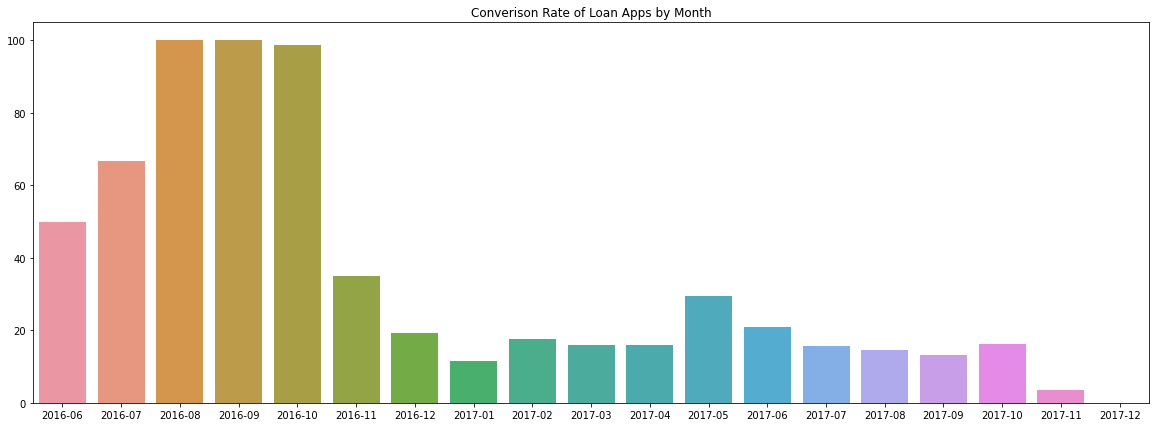

Text(0.5, 1.0, 'Converison Rate of Loan Apps by Month')

In [0]:
fig  = plt.figure(figsize=(20,7))
bp = sns.barplot(x = monthly_loan_stats.index.to_numpy(), y =(monthly_loan_stats.conversion_rate.to_numpy()*100))
plt.title('Converison Rate of Loan Apps by Month')


In [0]:
df.created_at.to_pandas()

Out[73]: 0 12
1 10
2 8
3 5
4 3
Name: created_at, dtype: int64

In [0]:
monthly = df.created_at.dt.
monthly_loan_stats = df.groupby(monthly).apply(group_functions)
monthly_loan_stats.index.rename('created_at_month', inplace=True)

In [0]:
monthly_loan_stats.head()

Out[55]:

,loan_amount_sum,loan_app_count,loan_funded_count,loan_app_amount_avg,conversion_rate,time_to_conversion_avg
created_at_month,,,,,,
1,202548964.0,532.0,61.0,380731.135338,0.114662,42.181947
2,89717845.0,256.0,45.0,350460.332031,0.175781,42.182244
3,82243514.0,229.0,35.0,359141.982533,0.152838,37.166837
4,79343170.0,201.0,27.0,394742.139303,0.134328,43.515018
5,93336543.0,252.0,61.0,370383.107143,0.242063,42.790706


Out[33]:

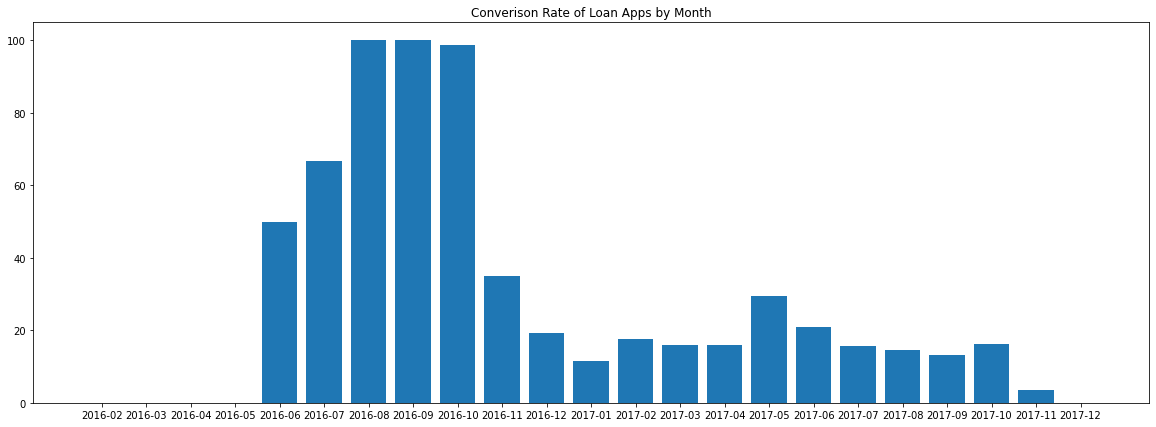

Text(0.5, 1.0, 'Converison Rate of Loan Apps by Month')

In [0]:
fig  = plt.figure(figsize=(20,7))
#bp = sns.barplot(x = monthly_loan_stats.index, y =(monthly_loan_stats.conversion_rate*100))
plt.bar(monthly_loan_stats.index.to_numpy(), (monthly_loan_stats.conversion_rate.to_numpy()*100))
plt.title('Converison Rate of Loan Apps by Month')
